PCA and Clustering


The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA)


### Step 1. Load data

Wheat kernels. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5NG8N.


In [35]:
# TODO: Import dataset and inspect the first five columns
feature_names = ['area', 'perimeter', 'compactness',
                 'length', 'width', 'coefficient', 'groove', 'target']

data = pd.read_csv("./data/pca_dataset.txt", sep='\t',
                   header=None, names=feature_names)
data.iloc[:, :5]

,area,perimeter,compactness,length,width
0,15.26,14.84,0.8710,5.763,3.312
1,14.88,14.57,0.8811,5.554,3.333
2,14.29,14.09,0.9050,5.291,3.337
3,13.84,13.94,0.8955,5.324,3.379
4,16.14,14.99,0.9034,5.658,3.562
...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981
206,11.23,12.88,0.8511,5.140,2.795
207,13.20,13.66,0.8883,5.236,3.232
208,11.84,13.21,0.8521,5.175,2.836


In [36]:
# inspect the first 5 rows
data.head()

,area,perimeter,compactness,length,width,coefficient,groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.


In [37]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print("X-shape:", X.shape)
print("y-shape:", y.shape)

X-shape: (210, 7)
y-shape: (210,)


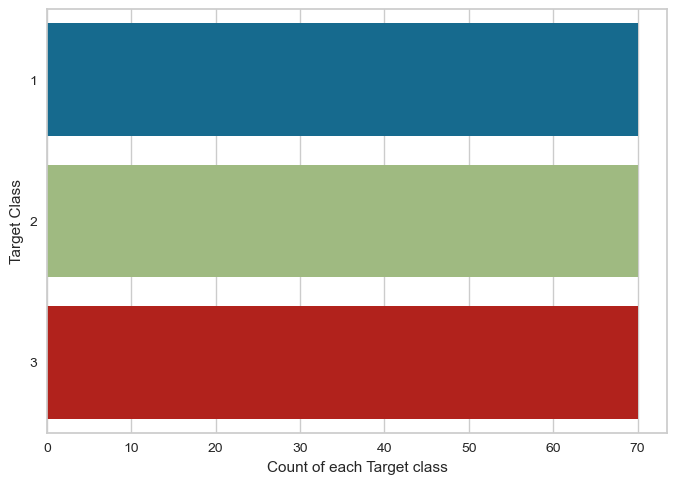

In [38]:
# plot the count of each value in df
sns.countplot(y=data.target, data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

# This plot shows that we have an equal number of items in each class. Classes are evenly distributed and not imbalanced.

In [39]:
# Investigate statistics about data
statistics = data.describe().transpose()
statistics

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
target,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [40]:
# Calculate outliers
# For a normal distribution, 99.7% of values are within 3 standard deviations of the mean, values outside of this are considered to be outliers
# source: https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/

outliers = pd.DataFrame()
outliers['low_value'] = statistics['mean'] - 3 * statistics['std']
outliers['high_value'] = statistics['mean'] + 3 * statistics['std']
outliers['low outliers?'] = statistics['min'] < outliers['low_value']
outliers['high outliers?'] = statistics['max'] > outliers['high_value']
outliers

# This shows we have outliers in the coefficient feature. Maximum value of 8.456 when 3 standard deviations from the mean would be 8.211

,low_value,high_value,low outliers?,high outliers?
area,6.118426,23.576622,False,False
perimeter,10.641410,18.477162,False,False
compactness,0.800110,0.941887,False,False
length,4.299343,6.957724,False,False
width,2.125461,4.391748,False,False
coefficient,-0.810470,8.210872,False,True
groove,3.933630,6.882513,False,False
target,-0.455343,4.455343,False,False


/Users/jennbushey/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


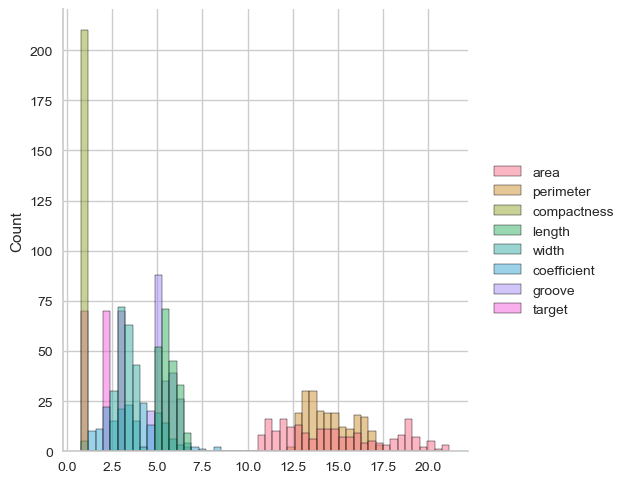

In [41]:
sns.displot(data, bins=50)
# This plot shows the data distribution of each feature. The features do not appear to be normally distributed. They are either skewed or multimodal.

### Step 2: Preprocessing


To preprocess the data, we will need to scale the data. Which scaler would you select and why?


_Answers_

1. Our classes are evenly distributed - each class has the same number of observations in the dataset.

1. The data has standard deviations varying from 0.02 to 2.91 and mean values from 0.87 to 14.85 indicating that the features are not using the same scale and do not have unit variance.

1. Plotting the data, we can tell that the distribution of the features are multimodal.

1. We have one feature that may have outliers.

I am choosing the Standard Scaler as it will standardize each feature so that they are on the same scale where mean = 0, standard deviation = 1, and variance = 1.

I am not selecting Robust Scaler to reduce the influence of outliers as we only have one outlier assuming a normal distribution which we have seen it may not be and the value of the maximum outlier isn't that far outside a three standard deviation range.

PCA requires each feature has a unit variance thus using StandardScaler is preferred.


Before we implement the scaler, we need to split the data into training and testing sets first.


In [42]:
y.shape

(210,)

In [43]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
# TODO: Print the shape of the training feature matrix and target vector
print("Training feature matrix shape:", X_train.shape)
print("Training target vector shape:", y_train.shape)

Training feature matrix shape: (157, 7)
Training target vector shape: (157,)


Now that we have our training data, we can implement our selected scaler.


In [45]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection


The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`


In [46]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

### Step 4: Validation


To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.


In [47]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
              'fit_intercept': [True, False]}

In [48]:
# TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(lr,         # model
                    param_grid,  # hyperparameters
                    cv=5,       # number of folds
                    )
grid.fit(X_train_scaled, y_train)
print("Best parameters are:", grid.best_params_)
print("Best cross validation score:", grid.best_score_)
print("Test-set score", grid.score(X_test_scaled, y_test))

Best parameters are: {'C': 10.0, 'fit_intercept': True}
Best cross validation score: 0.9368951612903226
Test-set score 0.9622641509433962


### Step 5: Visualize using PCA


Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.


In [49]:
# TODO: Predict y labels using best estimator
prediction = grid.best_estimator_.predict(X_test_scaled)
prediction

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 3,
       1, 2, 2, 1, 1, 2, 1, 2, 3])

In [50]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   # reduces from 7 components to 2
# fit and transform X_test_scaled using PCA and 2 components
projected = pca.fit_transform(X_test_scaled)

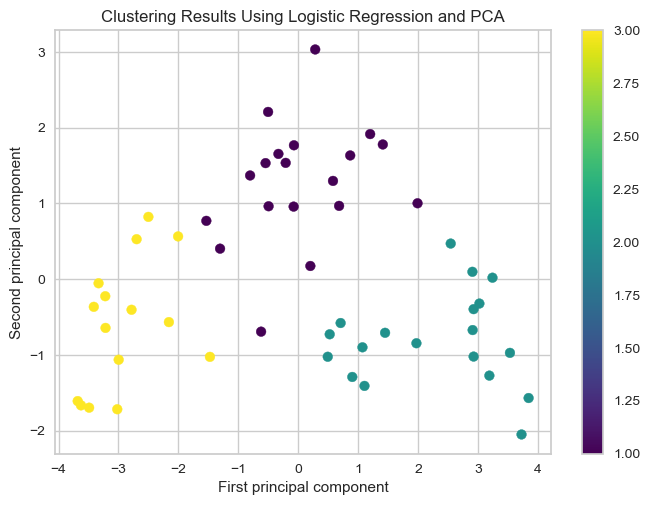

In [51]:
# TODO: Plot test points colored by predicted label
plt.figure()
plt.scatter(x=projected[:, 0],  # first principal component
            y=projected[:, 1],  # second principal component
            c=prediction,       # colour each point based on its predicted class
            cmap='viridis')     # colour scheme
plt.title('Clustering Results Using Logistic Regression and PCA')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar()
plt.show()

#### Questions

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion?
1. Did PCA work well for this model? How does this relate to the results from the model used?


_Answers_

1. Logistic regression model worked well for the dataset indicated by testing and training scores greater than 0.9. The training set produced a cross validated score of 0.94 and the testing set produced a score of 0.96. These scores are lower than 1.0 indicating that there is low bias in the model. The scores are quite close together indicating that the model has low variance.

1. PCA worked well as it is showing similarly classified and coloured points grouped together indicating that the model is accurately clustering the samples based on the similaries found in each class. The results from PCA and the predictions from the logistic regression appear to correlate to each other, that is the plotted PCA with the predicted labels match nicely suggesting that both models could predict similar classes given a test set of data. Both logistic regression and PCA are meant for use on linear data.


### Process Description

Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


_DESCRIBE YOUR PROCESS HERE_


1. From the textbook (Introduction to Machine Learning with Python), class and lab examples. Sklearn website.

-   https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/

2. Completed the steps in the outlined order: data exploration, splitting data, preprocessing including scaling, applying logistic regression model using grid search, validating the model, and visualizing the model using PCA.

3. I did not use generative AI.

4. Challenged by which scaler to use and when. Challenged by the interpretation of the PCA scatter plot. Looked into the lecture slides and textook for explaination and expanded my understanding of the explanation using google to get the same information explained in a way I understood.


## Part 2. Implement clustering


The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.


### Step 1: Cluster using original data

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed).


In [52]:
# TODO: Scale feature matrix
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.


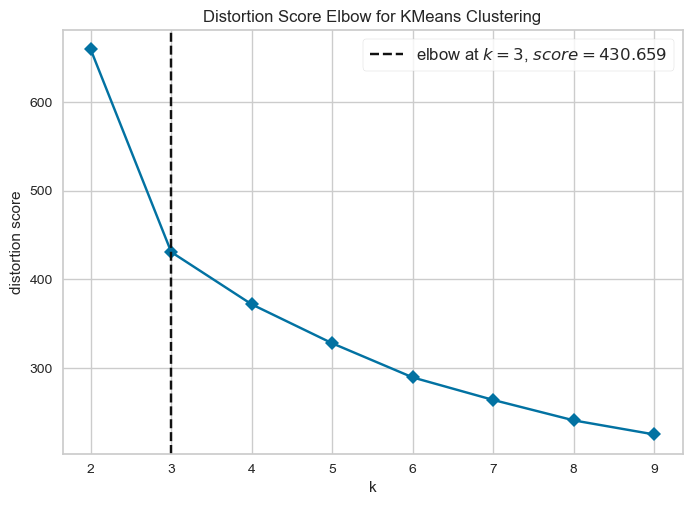

In [53]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
km = KMeans(random_state=0,  # seed number
            n_init=10       # default value, number of times k-means is fun with different centroid seeds
            )
visual = kelbow_visualizer(km,          # kmeans model
                           X=X_scaled,  # feature matrix
                           # range of values for k (number of clusters)
                           k=(2, 10),
                           metric="distortion",
                           timings=False
                           )

Next, implement Kmeans and calculate the following validation metrics:

-   Silhouette score
-   Calinski-Harabasz score
-   Davies-Bouldin score


In [54]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=visual.elbow_value_,     # from elbow visualization
                random_state=0,  # random seed
                n_init=10       # default value
                ).fit(X_scaled)  # fit to scaled feature matrix

In [55]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette score:", silhouette)

calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans.labels_)
print("Calinski-Harabasz score:", calinski_harabasz)

davies_bouldin = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies-Bouldin score:", davies_bouldin)

Silhouette score: 0.40072705527512986
Calinski-Harabasz score: 249.7841749161647
Davies-Bouldin score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.


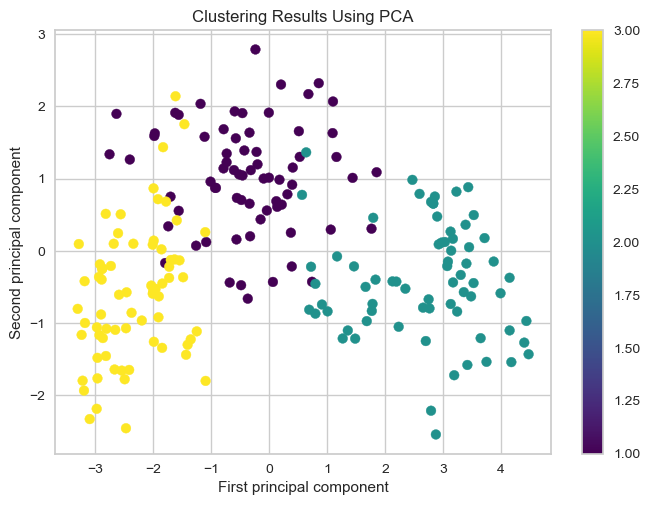

In [56]:
# TODO: Plot clustering results
pca = PCA(n_components=2)
# fit and transform X_test_scaled using PCA and 2 components
projected = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(x=projected[:, 0],  # first principal component
            y=projected[:, 1],  # second principal component
            c=y,                # colour each point based on its target class
            cmap='viridis')     # colour scheme
plt.title("Clustering Results Using PCA")
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar()
plt.show()

### Step 2: Cluster using PCA-transformed data

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.


Number of principal components needed to achieve explained variance ratio of 0.95 is: 3
Explained variance ration array: [7.18743027e-01 1.71081835e-01 9.68576341e-02 9.76635386e-03
 2.67337271e-03 7.61720812e-04 1.16056686e-04]


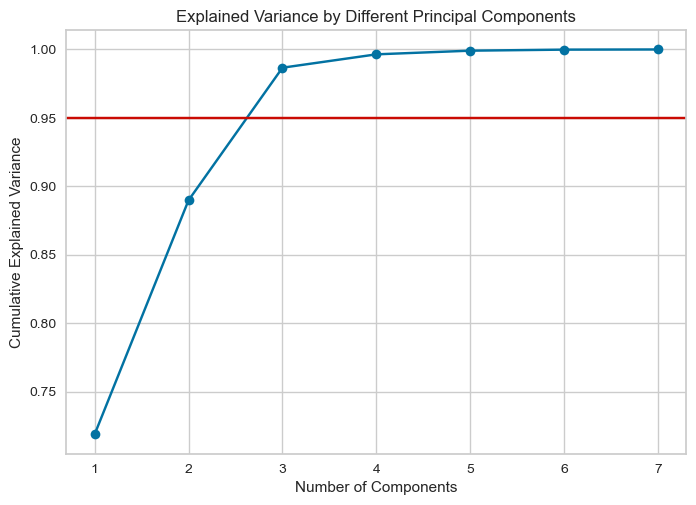

In [57]:
# TODO: Find the number of principal components using explained variance ratio

# putting desired explained variance directly into PCA instantiation
pca = PCA(n_components=0.95).fit(X_scaled)
print("Number of principal components needed to achieve explained variance ratio of 0.95 is:", pca.n_components_)

# print array with no PCA components selected
pca = PCA().fit(X_scaled)
print("Explained variance ration array:", pca.explained_variance_ratio_)

# graphically
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),  # change from 0-based array index to 1-based human-readable
         np.cumsum(pca.explained_variance_ratio_), marker='o')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.show()

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.


In [58]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

In [59]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=visual.elbow_value_,     # from elbow visualization
                random_state=0,  # random seed
                n_init=10       # default value
                ).fit(pca_result)

In [60]:
# TODO: Calculate the three different validation metrics
silhouette2 = silhouette_score(pca_result, kmeans.labels_)
print("Silhouette score:", silhouette2)

calinski_harabasz2 = calinski_harabasz_score(pca_result, kmeans.labels_)
print("Calinski-Harabasz score:", calinski_harabasz2)

davies_bouldin2 = davies_bouldin_score(pca_result, kmeans.labels_)
print("Davies-Bouldin score:", davies_bouldin2)

Silhouette score: 0.4100823639350389
Calinski-Harabasz score: 260.28850656356855
Davies-Bouldin score: 0.9030688438741864


### Step 3: Display results

Print the results for Steps 2 and 3 in a table. Include column and row labels


In [61]:
# TODO: Display results
results = pd.DataFrame()
results_list = [[silhouette, calinski_harabasz, davies_bouldin], [
    silhouette2, calinski_harabasz2, davies_bouldin2]]
results = pd.DataFrame(results_list, columns=["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"], index=[
                       'Cluster Using Original Data', 'Cluster Using PCA-transformed Data'])
results

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
Cluster Using Original Data,0.400727,249.784175,0.927871
Cluster Using PCA-transformed Data,0.410082,260.288507,0.903069


> Silhouette score - ranges from -1 to 1. 0-1 means the values are well matched to the cluster. Negative values means that the values are not matched to the cluster.

> Calinski-Harabasz score - the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters. Higher values are better.

> Davies-Bouldin score - A lower score signifies better-defined clusters.


#### Questions

1. Did the optimal number of clusters make sense based on the context?
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results?
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not?


_Answers_

1. The number of clusters determined from the elbow method was 3. This makes sense as there are 3 classes in the data.

1. We got similar results for the PCA plots in Part 1 and Part 2. The distribution of the clustered results look similar even though there is vastly more information and overlapping clusters in the second plot. Second plot was not split into testing and training sets like the data used in Part 1.

1. 3 components were used to explain 95% of the variance. PCA slightly improved the results. Minor improvement using the silhouette score, minor improvement using the Calinski-Harabasz score, and the Davies-Bouldin Score suggests that the PCA slightly improved the definition of the clusters. It makes sense that the results slightly improved after determining the number of components to explain 95% of the variance as we originally were using a number of components that explained approximately 90% of the variance.


### Process Description

Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


_DESCRIBE YOUR PROCESS HERE_


1. From the textbook (Introduction to Machine Learning with Python), class and lab examples. Sklearn website.

-   n-components graph: https://mikulskibartosz.name/pca-how-to-choose-the-number-of-components

2. Completed the steps in the outlined order: Scaled original data, determined the optimal number of clusters using the elbow method, implemented KMeans then PCA with 2 components. Then determined the number of components to account for 95% variance and implemented PCA with 3 components and KMeans

3. I did not use generative AI.

4. Challenged by understanding what the different scores do and mean. Looked to the course material and confirmed using google to get the same information explained in another way.
